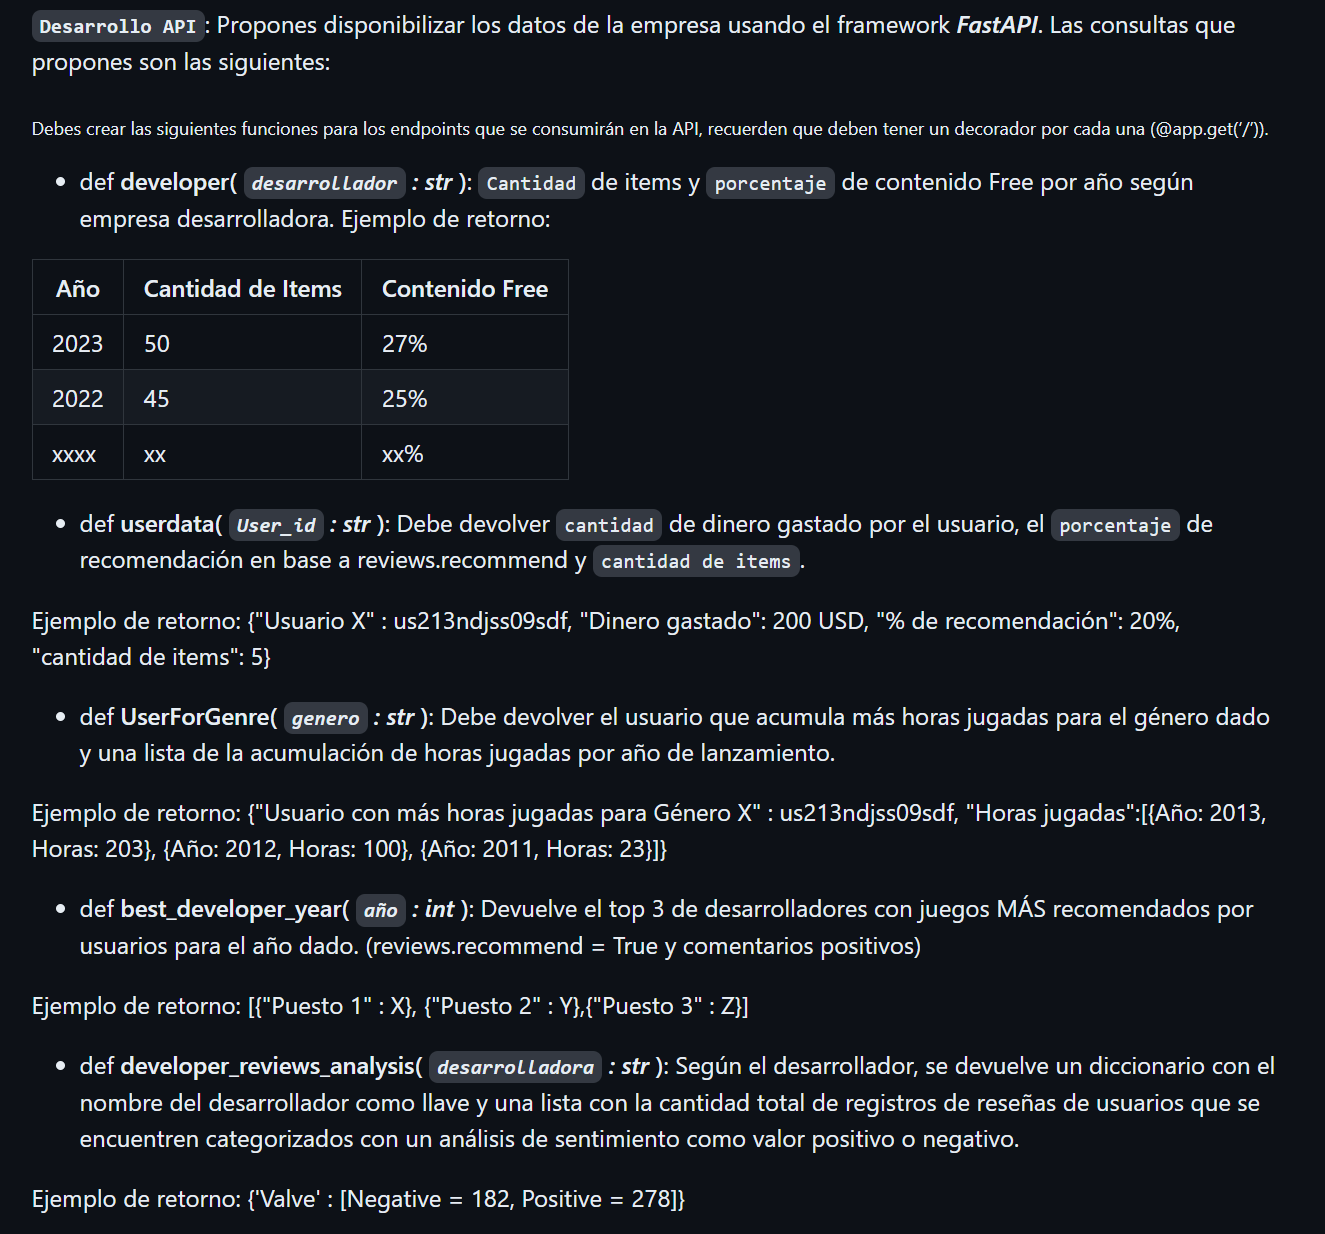

In [129]:
import pandas as pd 
import os

In [127]:
# Ruta del archivo CSV
archivo_games = 'df_games_api.csv'
archivo_items = 'df_items_api.csv'
archivo_reviews = 'df_reviews_api.csv'
df_api_g  = pd.read_csv(archivo_games)
df_api_i  = pd.read_csv(archivo_items)
df_api_r  = pd.read_csv(archivo_reviews)


In [128]:
# Funcion para revisar el tipo de dato de cada dataset antes de ser exportados
def verificar_tipo_datos(df):
    mi_dict = {"nombre_campo": [], "tipo_datos": []}
    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
    df_info = pd.DataFrame(mi_dict)
    return df_info
     

- def developer( desarrollador : str ): Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora. Ejemplo de retorno:

In [56]:
df_end_p1 = df_api_g[['developer', 'item_id','release_date','price']]
df_end_p1.head()

,developer,item_id,release_date,price
0,Kotoshiro,761140.0,2018-01-04,4.99
1,Kotoshiro,761140.0,2018-01-04,4.99
2,Kotoshiro,761140.0,2018-01-04,4.99
3,Kotoshiro,761140.0,2018-01-04,4.99
4,Kotoshiro,761140.0,2018-01-04,4.99


In [57]:
df_end_p1['price'].isna().sum()


3346

In [58]:
# Convertir release_date a tipo datetime
df_end_p1['release_date'] = pd.to_datetime(df_end_p1['release_date'])

# Agrupar por desarrollador y año de lanzamiento
grouped = df_end_p1.groupby(['developer', df_end_p1['release_date'].dt.year])

# Calcular cantidad de items por desarrollador y año
cantidad_items = grouped['item_id'].count()

# Filtrar 'Free to Play' y contarlos por desarrollador y año
contenido_free = grouped.apply(lambda x: x[x['price'] == 'Free to Play']['price'].count())

# Crear el nuevo DataFrame
df_nuevo = pd.DataFrame({'Cantidad de Items': cantidad_items, 'Contenido Free': contenido_free})

# Reiniciar los índices
df_nuevo = df_nuevo.reset_index()


C:\Users\Jorge\AppData\Local\Temp\ipykernel_18260\1554666173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_p1['release_date'] = pd.to_datetime(df_end_p1['release_date'])


In [59]:
df_nuevo

,developer,release_date,Cantidad de Items,Contenido Free
0,+7 Software,2016,4,0
1,"+Mpact Games, LLC.",2017,3,0
2,.M.Y.W.,2016,2,0
3,.ez Games,2017,5,0
4,07th Expansion,2015,2,0
...,...,...,...,...
15019,萌石游戏,2017,4,0
15020,高考恋爱委员会,2015,4,4
15021,"高考恋爱委员会,Days",2015,4,0
15022,"高考恋爱委员会,橘子班",2015,4,0


In [60]:
df_nuevo['Porcentaje Free'] = ((df_nuevo['Contenido Free'] / df_nuevo['Cantidad de Items'])*100).round(2)

In [61]:
df_nuevo.sort_values(by='Cantidad de Items', ascending=False)

,developer,release_date,Cantidad de Items,Contenido Free,Porcentaje Free
11511,"SmiteWorks USA, LLC",2017,1284,12,0.93
11510,"SmiteWorks USA, LLC",2016,693,0,0.00
13260,Ubisoft - San Francisco,2017,538,0,0.00
13257,Ubisoft - San Francisco,2014,530,0,0.00
13258,Ubisoft - San Francisco,2015,495,0,0.00
...,...,...,...,...,...
4570,"Fernando Ramallo,David Kanaga",2015,1,0,0.00
2505,City Interactive,2008,1,0,0.00
3871,Dust Devil Studios Inc.,2010,1,0,0.00
1052,Ascaron Entertainment ltd.,2004,1,0,0.00


In [62]:
df_end_point_1 = df_nuevo[['developer','release_date','Cantidad de Items','Porcentaje Free']]

In [63]:
df_end_point_1 = df_end_point_1.rename(columns={'developer': 'Developer', 'release_date': 'Año', 'Porcentaje Free': 'Contenido Free'})
df_end_point_1

,Developer,Año,Cantidad de Items,Contenido Free
0,+7 Software,2016,4,0.0
1,"+Mpact Games, LLC.",2017,3,0.0
2,.M.Y.W.,2016,2,0.0
3,.ez Games,2017,5,0.0
4,07th Expansion,2015,2,0.0
...,...,...,...,...
15019,萌石游戏,2017,4,0.0
15020,高考恋爱委员会,2015,4,100.0
15021,"高考恋爱委员会,Days",2015,4,0.0
15022,"高考恋爱委员会,橘子班",2015,4,0.0


In [64]:
verificar_tipo_datos(df_end_point_1)

,nombre_campo,tipo_datos
0,Developer,[<class 'str'>]
1,Año,[<class 'int'>]
2,Cantidad de Items,[<class 'int'>]
3,Contenido Free,[<class 'float'>]


In [65]:
df_end_point_1.to_csv('df_endp1.csv')


In [108]:
# Ruta donde se guardará el archivo CSV
ruta_csv = os.path.join('csv_endpoint', 'df_endp1.csv')
df_end_point_1.to_csv(ruta_csv, index=False) 

- def userdata( User_id : str ): Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.

Ejemplo de retorno: {"Usuario X" : us213ndjss09sdf, "Dinero gastado": 200 USD, "% de recomendación": 20%, "cantidad de items": 5}

In [66]:
df_end_p2_g = df_api_g[['item_id','price',]]
df_end_p2_i = df_api_i[['item_id', 'items_count', 'user_id']]
df_end_p2_r = df_api_r[['user_id', 'recommend']]

In [67]:
# Convertir la columna price a float y valores a cero
df_end_p2_g['price'] = df_end_p2_g['price'].replace('Free to Play', 0)
df_end_p2_g['price'] = df_end_p2_g['price'].astype(float)
df_end_p2_g

C:\Users\Jorge\AppData\Local\Temp\ipykernel_18260\1501596718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_p2_g['price'] = df_end_p2_g['price'].replace('Free to Play', 0)
C:\Users\Jorge\AppData\Local\Temp\ipykernel_18260\1501596718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_p2_g['price'] = df_end_p2_g['price'].astype(float)


,item_id,price
0,761140.0,4.99
1,761140.0,4.99
2,761140.0,4.99
3,761140.0,4.99
4,761140.0,4.99
...,...,...
74832,610660.0,1.99
74833,610660.0,1.99
74834,658870.0,4.99
74835,658870.0,4.99


In [68]:
# Realizar un merge para unir el df games con df items a traves del item_id
df_merge_gi_2 = pd.merge(df_end_p2_g, df_end_p2_i, on='item_id')
df_merge_gi_2 = df_merge_gi_2.dropna()
df_merge_gi_2.head(2)

,item_id,price,items_count,user_id
0,282010.0,9.99,53,tepion
1,282010.0,9.99,53,tepion


In [69]:
# Crear la columna dienro gastado para cada user_id
df_merge_gi_2['dinero gastado'] = df_merge_gi_2['items_count'] * df_merge_gi_2['price']
df_merge_gi_2.head(5)

,item_id,price,items_count,user_id,dinero gastado
0,282010.0,9.99,53,tepion,529.47
1,282010.0,9.99,53,tepion,529.47
2,282010.0,9.99,60,76561198090194786,599.40
3,282010.0,9.99,28,76561198046561539,279.72
4,282010.0,9.99,53,tepion,529.47


In [70]:
# Realizar el trabajo en el df de reviews
df_end_p2_r.head(5)

,user_id,recommend
0,76561198079601835,True
1,MeaTCompany,True
2,76561198089393905,True
3,76561198089393905,True
4,76561198156664158,True


In [71]:
# Agrupar por el user_id
df_recommends = df_end_p2_r.groupby('user_id')['recommend'].value_counts().unstack(fill_value=0)
# Renombrar las columnas
df_recommends.columns = ['recommend_True', 'recommend_False']
df_recommends = df_recommends.reset_index()

In [72]:
# Agregar la columna Total_Ture
df_recommends['Total_True'] = ((df_recommends['recommend_True']/(df_recommends['recommend_True'] + df_recommends['recommend_False']))*100).round(2)
df_recommends.sort_values(by='recommend_True', ascending=False). head(10)

,user_id,recommend_True,recommend_False,Total_True
1024,76561198023508728,9,0,100.00
1844,76561198044023118,6,12,33.33
3596,76561198063648921,6,6,50.00
6192,76561198084622842,5,4,55.56
3240,76561198060557951,5,4,55.56
5350,76561198077596124,5,5,50.00
8427,76561198193227423,5,4,55.56
13248,dogapp,4,1,80.00
6583,76561198088407985,4,5,44.44
11466,SirexPower,4,2,66.67


In [76]:
df_merge_endp2 = pd.merge(df_merge_gi_2, df_recommends, on='user_id')
df_merge_endp2

,item_id,price,items_count,user_id,dinero gastado,recommend_True,recommend_False,Total_True
0,70.0,9.99,102,76561197995098683,1018.98,0,2,0.0
1,2990.0,9.99,102,76561197995098683,1018.98,0,2,0.0
2,7670.0,19.99,102,76561197995098683,2038.98,0,2,0.0
3,7670.0,19.99,102,76561197995098683,2038.98,0,2,0.0
4,32370.0,9.99,102,76561197995098683,1018.98,0,2,0.0
...,...,...,...,...,...,...,...,...
48573,550.0,19.99,3,76561198101957454,59.97,0,1,0.0
48574,550.0,19.99,3,76561198105569576,59.97,0,1,0.0
48575,550.0,19.99,4,76561198115520810,79.96,0,1,0.0
48576,15620.0,19.99,2,76561198056915834,39.98,0,1,0.0


In [80]:
df_end_point_2 = df_merge_endp2[['user_id','price','Total_True','items_count']]
df_end_point_2 = df_end_point_2.rename(columns={'price': 'Dinero Gastado',
                                                'Total_True': 'P de Recomendacion',
                                                'items_count': 'Cantidad de Items'})
df_end_point_2.sort_values(by='P de Recomendacion', ascending=False).head(5)

,user_id,Dinero Gastado,P de Recomendacion,Cantidad de Items
15100,76561198093240797,19.99,100.0,43
16733,76561198099885653,9.99,100.0,38
28589,76561198034676642,19.99,100.0,12
28588,76561198034676642,19.99,100.0,12
28587,76561198034676642,0.00,100.0,12


In [82]:
verificar_tipo_datos(df_end_point_2)

,nombre_campo,tipo_datos
0,user_id,[<class 'str'>]
1,Dinero Gastado,[<class 'float'>]
2,P de Recomendacion,[<class 'float'>]
3,Cantidad de Items,[<class 'int'>]


In [83]:
df_end_point_2.to_csv('df_endp2.csv')

In [109]:
# Ruta donde se guardará el archivo CSV
ruta_csv = os.path.join('csv_endpoint', 'df_endp2.csv')
df_end_point_2.to_csv(ruta_csv, index=False) 

- def UserForGenre( genero : str ): Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año de lanzamiento.

Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}

In [84]:
df_end_p3_g = df_api_g[['genres','item_id','release_date']]
df_end_p3_i = df_api_i[['item_id', 'playtime_forever', 'user_id']]

In [85]:
# Realizar un merge para unir el df games con df items a traves del item_id
df_merge_gi_3 = pd.merge(df_end_p3_g, df_end_p3_i, on='item_id')
df_merge_gi_3.sample(10,random_state=7)

,genres,item_id,release_date,playtime_forever,user_id
216611,Action,237310.0,2014-07-02,0,76561198093047209
314032,RPG,42910.0,2011-01-25,1245,76561198074359988
60846,RPG,109600.0,2013-12-05,75,76561198082902745
171705,Casual,482920.0,2016-07-05,11409,76561198098572250
44801,Action,730.0,2012-08-21,821,76561198046370378
225781,RPG,237930.0,2014-05-20,79,lordtumnas
82008,Sports,207140.0,2016-04-19,285,76561198074048466
148630,Action,304930.0,2017-07-07,19,cheese13531
237917,Action,221100.0,2013-12-16,9720,mrwolf93
250883,Action,206420.0,2013-08-19,353,76561198074960944


In [86]:
df_merge_gi_3 = df_merge_gi_3.dropna()
df_merge_gi_3['genres'] = df_merge_gi_3['genres'].dropna()

In [87]:
df_merge_gi_3['playtime_forever'] = df_merge_gi_3['playtime_forever'].astype(int)
df_merge_gi_3.sample(10,random_state=7)

,genres,item_id,release_date,playtime_forever,user_id
80808,Action,250900.0,2014-11-04,6873,76561198093452976
237924,Action,221100.0,2013-12-16,18265,76561198068463750
114378,Early Access,433850.0,2016-02-17,0,76561198045638432
313210,Action,42910.0,2011-01-25,52,76561198069241312
50895,Action,221040.0,2013-03-22,138,76561198001344142
152063,Action,304930.0,2017-07-07,39,CintyApache
36124,Indie,200210.0,2012-02-20,42,SadHon127Steam
335189,Action,2630.0,2005-10-25,1703,fastarms
8983,Action,12220.0,2010-04-12,0,76561198097961149
294217,Free to Play,209870.0,2012-07-02,556,jenkinszeboatman


In [88]:
df_merge_gi_3['release_date'] = pd.to_datetime(df_merge_gi_3['release_date'])
df_merge_gi_3['release_date'] = df_merge_gi_3['release_date'].dt.year
df_merge_gi_3.sample(10,random_state=7)


,genres,item_id,release_date,playtime_forever,user_id
80808,Action,250900.0,2014,6873,76561198093452976
237924,Action,221100.0,2013,18265,76561198068463750
114378,Early Access,433850.0,2016,0,76561198045638432
313210,Action,42910.0,2011,52,76561198069241312
50895,Action,221040.0,2013,138,76561198001344142
152063,Action,304930.0,2017,39,CintyApache
36124,Indie,200210.0,2012,42,SadHon127Steam
335189,Action,2630.0,2005,1703,fastarms
8983,Action,12220.0,2010,0,76561198097961149
294217,Free to Play,209870.0,2012,556,jenkinszeboatman


In [89]:
df_end_point_3 = df_merge_gi_3

In [90]:
verificar_tipo_datos(df_end_point_3)

,nombre_campo,tipo_datos
0,genres,[<class 'str'>]
1,item_id,[<class 'float'>]
2,release_date,[<class 'int'>]
3,playtime_forever,[<class 'int'>]
4,user_id,[<class 'str'>]


In [91]:
df_end_point_3.to_csv('df_endp3.csv')

In [110]:
# Ruta donde se guardará el archivo CSV
ruta_csv = os.path.join('csv_endpoint', 'df_endp3.csv')
df_end_point_3.to_csv(ruta_csv, index=False) 

- def best_developer_year( año : int ): Devuelve el top 3 de desarrolladores con juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos)

Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]

In [92]:
df_end_p4_g = df_api_g[['item_id','release_date','developer']]
df_end_p4_r = df_api_r[['item_id', 'recommend', 'sentiment_analysis']]

In [93]:
# Realizar un merge para unir el df games con df review a traves del item_id
df_merge_gr_4 = pd.merge(df_end_p4_g, df_end_p4_r, on='item_id')
df_merge_gr_4 = df_merge_gr_4.dropna()
df_merge_gr_4.sample(10,random_state=7)

,item_id,release_date,developer,recommend,sentiment_analysis
37513,237930.0,2014-05-20,Supergiant Games,True,2
44083,252490.0,2013-12-11,Facepunch Studios,True,2
29381,394360.0,2016-06-06,Paradox Development Studio,True,0
30572,397340.0,2015-12-17,"Jundroo, LLC",True,1
10571,210770.0,2013-05-15,Coffee Stain Studios,True,1
3038,8930.0,2010-09-21,"Firaxis Games,Aspyr (Mac, Linux)",True,2
56528,105600.0,2011-05-16,Re-Logic,True,2
43713,252490.0,2013-12-11,Facepunch Studios,False,0
40003,221100.0,2013-12-16,Bohemia Interactive,True,2
43864,252490.0,2013-12-11,Facepunch Studios,True,0


In [94]:
df_merge_gr_4['release_date'] = pd.to_datetime(df_merge_gr_4['release_date'])
df_merge_gr_4['release_date'] = df_merge_gr_4['release_date'].dt.year
df_merge_gr_4['release_date'] = df_merge_gr_4['release_date'].astype(int)
df_merge_gr_4['sentiment_analysis'] = df_merge_gr_4['sentiment_analysis'].astype(int)
df_merge_gr_4.sample(10,random_state=7)

,item_id,release_date,developer,recommend,sentiment_analysis
37513,237930.0,2014,Supergiant Games,True,2
44083,252490.0,2013,Facepunch Studios,True,2
29381,394360.0,2016,Paradox Development Studio,True,0
30572,397340.0,2015,"Jundroo, LLC",True,1
10571,210770.0,2013,Coffee Stain Studios,True,1
3038,8930.0,2010,"Firaxis Games,Aspyr (Mac, Linux)",True,2
56528,105600.0,2011,Re-Logic,True,2
43713,252490.0,2013,Facepunch Studios,False,0
40003,221100.0,2013,Bohemia Interactive,True,2
43864,252490.0,2013,Facepunch Studios,True,0


In [95]:
df_end_point_4 = df_merge_gr_4[['developer','release_date','recommend','sentiment_analysis']]
df_end_point_4 = df_end_point_4.rename(columns={'developer': 'Desarrollador',
                                                'release_date': 'Año'})
df_end_point_4.sample(10,random_state=7)

,Desarrollador,Año,recommend,sentiment_analysis
37513,Supergiant Games,2014,True,2
44083,Facepunch Studios,2013,True,2
29381,Paradox Development Studio,2016,True,0
30572,"Jundroo, LLC",2015,True,1
10571,Coffee Stain Studios,2013,True,1
3038,"Firaxis Games,Aspyr (Mac, Linux)",2010,True,2
56528,Re-Logic,2011,True,2
43713,Facepunch Studios,2013,False,0
40003,Bohemia Interactive,2013,True,2
43864,Facepunch Studios,2013,True,0


In [96]:
verificar_tipo_datos(df_end_point_4)

,nombre_campo,tipo_datos
0,Desarrollador,[<class 'str'>]
1,Año,[<class 'int'>]
2,recommend,[<class 'bool'>]
3,sentiment_analysis,[<class 'int'>]


In [97]:
df_end_point_4.to_csv('df_endp4.csv')

In [111]:
# Ruta donde se guardará el archivo CSV
ruta_csv = os.path.join('csv_endpoint', 'df_endp4.csv')
df_end_point_4.to_csv(ruta_csv, index=False) 

- def developer_reviews_analysis( desarrolladora : str ): Según el desarrollador, se devuelve un diccionario con el nombre del desarrollador como llave y una lista con la cantidad total de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento como valor positivo o negativo.

Ejemplo de retorno: {'Valve' : [Negative = 182, Positive = 278]}



In [98]:
df_end_p5_g = df_api_g[['item_id', 'developer']]
df_end_p5_r = df_api_r[['item_id', 'sentiment_analysis']]

In [99]:
# Realizar un merge para unir el df games con df reviews a traves del item_id
df_merge_gr_5 = pd.merge(df_end_p5_g, df_end_p5_r, on='item_id')
df_merge_gr_5.sample(10,random_state=7)

,item_id,developer,sentiment_analysis
7360,730.0,Valve,2
23217,227940.0,Reto-Moto,2
5752,57740.0,"Coreplay GmbH,Bigmoon Studios",0
35293,330830.0,Telltale Games,1
3974,102700.0,Red Duck Inc.,0
2506,10180.0,"Infinity Ward,Aspyr (Mac)",2
54806,48705.0,"TaleWorlds Entertainment,Flying Squirrel Enter...",2
16582,299740.0,Entrada Interactive LLC,2
6035,200210.0,Wild Shadow Studios,0
35256,330840.0,Telltale Games,2


In [100]:
df_merge_gr_5['sentiment_analysis'] = df_merge_gr_5['sentiment_analysis'].astype(int)

In [101]:
# Eliminar las filas que contengan valores iguales a 1 ya que uno es un sentimiento neutral y no se usa

df_merge_gr_5 = df_merge_gr_5[df_merge_gr_5['sentiment_analysis'] != 1]
df_merge_gr_5['sentiment_analysis'].unique()

array([0, 2])

In [102]:
df_merge_gr_5['developer'] = df_merge_gr_5['developer'].astype(str)

In [103]:
df_end_point_5 = df_merge_gr_5[['developer', 'sentiment_analysis',]]
df_end_point_5 = df_end_point_5.rename(columns={'developer': 'Desarrollador'})
df_end_point_5

,Desarrollador,sentiment_analysis
0,Valve,0
1,Valve,2
3,Valve,2
4,Valve,2
5,Valve,0
...,...,...
64443,Gearbox Software,2
64444,Valve,2
64446,"Epic Games, Inc.",2
64447,"Epic Games, Inc.",2


In [104]:
df_end_point_5['Desarrollador']

0                   Valve
1                   Valve
3                   Valve
4                   Valve
5                   Valve
               ...       
64443    Gearbox Software
64444               Valve
64446    Epic Games, Inc.
64447    Epic Games, Inc.
64454               Valve
Name: Desarrollador, Length: 47499, dtype: object

In [105]:
verificar_tipo_datos(df_end_point_5)

,nombre_campo,tipo_datos
0,Desarrollador,[<class 'str'>]
1,sentiment_analysis,[<class 'int'>]


In [106]:
df_end_point_5.to_csv('df_endp5.csv')

In [112]:
# Ruta donde se guardará el archivo CSV
ruta_csv = os.path.join('csv_endpoint', 'df_endp5.csv')
df_end_point_5.to_csv(ruta_csv, index=False) 